#Bài tập thực hành - Lập trình máy học cho python - CS116.M11



MSSV: 19521299

Tên: Nguyễn Chí Cường

Ngày: 19/10/2021

Tuần 7

#Bước 1: Đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


#Bước 2: Scale dữ liệu

In [3]:
scaler = MinMaxScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])
df

,Age,EstimatedSalary,Purchased
0,0.023810,0.029630,0
1,0.404762,0.037037,0
2,0.190476,0.207407,0
3,0.214286,0.311111,0
4,0.023810,0.451852,0
...,...,...,...
395,0.666667,0.192593,1
396,0.785714,0.059259,1
397,0.761905,0.037037,1
398,0.428571,0.133333,0


#Các model

In [4]:
data_ = df[['Age', 'EstimatedSalary']]
class_ = df[['Purchased']]

In [5]:
#Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(data_, class_, test_size=0.2, random_state=2)

##KNN Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
predict_KNN = KNN.predict(X_test)
print(classification_report(y_test, predict_KNN))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.93      0.88      0.90        32

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80



##SVM

In [7]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train)
predict_SVM = SVM.predict(X_test)
print(classification_report(y_test, predict_SVM))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.90      0.84      0.87        32

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



##Decision Tree

In [8]:
from sklearn import tree
DTree = tree.DecisionTreeClassifier()
DTree.fit(X_train, y_train)
predict_Tree = DTree.predict(X_test)
print(classification_report(y_test, predict_Tree))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.83      0.78      0.81        32

    accuracy                           0.85        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.85      0.85        80



##Naive BayesiaBayesn

In [9]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
print("Multinomia Naive Bayes -----------------------------------------")
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predict_MNB = MNB.predict(X_test)
print(classification_report(y_test, predict_MNB))
print("Bernoulli Naive Bayes ------------------------------------------")
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predict_BNB = BNB.predict(X_test)
print(classification_report(y_test, predict_BNB))

Multinomia Naive Bayes -----------------------------------------
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        48
           1       0.00      0.00      0.00        32

    accuracy                           0.60        80
   macro avg       0.30      0.50      0.37        80
weighted avg       0.36      0.60      0.45        80

Bernoulli Naive Bayes ------------------------------------------
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        48
           1       0.00      0.00      0.00        32

    accuracy                           0.60        80
   macro avg       0.30      0.50      0.37        80
weighted avg       0.36      0.60      0.45        80



##Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_test)
print(classification_report(y_test, predict_RF))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.91      0.94      0.92        32

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



##Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
predict_LR = lr_clf.predict(X_test)
print(classification_report(y_test, predict_LR))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        48
           1       0.90      0.59      0.72        32

    accuracy                           0.81        80
   macro avg       0.84      0.78      0.79        80
weighted avg       0.83      0.81      0.80        80



##Kernel SVM

In [12]:
kernel_svm = []
for kernel in ['poly', 'rbf', 'sigmoid']:
  print(kernel + ' -----------------------------------------')
  clf_svm = svm.SVC(kernel=kernel, coef0=0)
  kernel_svm.append(clf_svm)
  clf_svm.fit(X_train, y_train)
  predict_kernel = clf_svm.predict(X_test)
  print(classification_report(y_test, predict_kernel))

poly -----------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        48
           1       0.93      0.78      0.85        32

    accuracy                           0.89        80
   macro avg       0.90      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80

rbf -----------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.90      0.84      0.87        32

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80

sigmoid -----------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.42      0.42        48
           1       0.15      0.16      0.15        32

    accuracy                           

#Bước 3: Đánh giá K-fold

In [13]:
def Kflod_score(model, n):
  cv = ShuffleSplit(n_splits=n, test_size=0.2, random_state=0)
  score = cross_val_score(model, data_, class_, cv=cv)
  return score

In [14]:
models = zip(("KNN Classifier", "SVM", "Decision Tree", "Multinomia Naive Bayes", "Bernoulli Naive Bayes", "Random Forest", "Logistic Regression", "Polynomial SVM", "RBF SVM", "Sigmoid SVM"),
             [KNN, SVM, DTree, MNB, BNB, RF, lr_clf] + kernel_svm)
for txt, model in models:
  score = Kflod_score(model, 5)
  print(txt + " ------------------------------------------------------------------------------------")
  print("Accuracy: ", score.mean())
  print("Độ lệch chuẩn: ", score.std())
  print('\n')

KNN Classifier ------------------------------------------------------------------------------------
Accuracy:  0.9125
Độ lệch chuẩn:  0.022360679774997894


SVM ------------------------------------------------------------------------------------
Accuracy:  0.9199999999999999
Độ lệch chuẩn:  0.01499999999999999


Decision Tree ------------------------------------------------------------------------------------
Accuracy:  0.875
Độ lệch chuẩn:  0.024999999999999977


Multinomia Naive Bayes ------------------------------------------------------------------------------------
Accuracy:  0.6325000000000001
Độ lệch chuẩn:  0.06254998001598401


Bernoulli Naive Bayes ------------------------------------------------------------------------------------
Accuracy:  0.6325000000000001
Độ lệch chuẩn:  0.06254998001598401


Random Forest ------------------------------------------------------------------------------------
Accuracy:  0.925
Độ lệch chuẩn:  0.017677669529663674


Logistic Regression -----

#Bước 4: Bảng so sánh Accuracy

In [15]:
name = ["KNN Classifier", "SVM", "Decision Tree", "Multinomia Naive Bayes", "Bernoulli Naive Bayes", "Random Forest", "Logistic Regression", "Polynomial SVM", "RBF SVM", "Sigmoid SVM"]
models = [KNN, SVM, DTree, MNB, BNB, RF, lr_clf] + kernel_svm
scores = []
acc = []
for model in models:
  score = Kflod_score(model, 5)
  scores.append(score)
  acc.append(score.mean())

frame = {"Model": name, "Score": scores, "Accuracy": acc}
table_score = pd.DataFrame(frame)
table_score

,Model,Score,Accuracy
0,KNN Classifier,"[0.95, 0.8875, 0.9, 0.9, 0.925]",0.9125
1,SVM,"[0.95, 0.9125, 0.9125, 0.9125, 0.9125]",0.9200
2,Decision Tree,"[0.9125, 0.8625, 0.85, 0.8375, 0.875]",0.8675
3,Multinomia Naive Bayes,"[0.725, 0.5375, 0.6, 0.6375, 0.6625]",0.6325
4,Bernoulli Naive Bayes,"[0.725, 0.5375, 0.6, 0.6375, 0.6625]",0.6325
5,Random Forest,"[0.95, 0.925, 0.9375, 0.9, 0.9125]",0.9250
6,Logistic Regression,"[0.925, 0.775, 0.8125, 0.8125, 0.8]",0.8250
7,Polynomial SVM,"[0.9375, 0.9, 0.8875, 0.8875, 0.9125]",0.9050
8,RBF SVM,"[0.95, 0.9125, 0.9125, 0.9125, 0.9125]",0.9200
9,Sigmoid SVM,"[0.3125, 0.25, 0.2875, 0.3125, 0.3375]",0.3000


In [16]:
table_score.to_csv("Compare_Model.csv")

#Visualize Accuracy

In [17]:
import matplotlib.pyplot as plt

In [18]:
def Visualize(txt):
  fig, ax = plt.subplots()

  label = ['KNN', 'SVM', 'DT', 'MNB', 'BNB', 'RF', 'LR', 'Poly', 'RBF', 'Sigmoid']
  ax.bar(label, table_score[txt])
  ax.set_title(txt + ' Model', fontweight='bold',fontfamily='serif')
  for i in ['top','right']:
    ax.spines[i].set_visible(False)
  ax.grid(linestyle=':',axis='y')
  ax.set_xlabel('Model')
  ax.set_ylabel(txt)

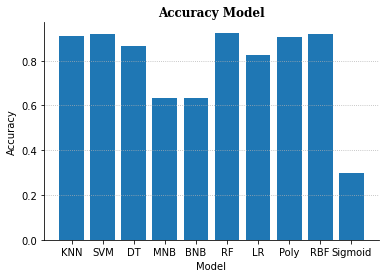

In [19]:
Visualize('Accuracy')

In [21]:
#Tìm min-max accuracy
idx_max = table_score['Accuracy'].idxmax()
idx_min = table_score['Accuracy'].idxmin()
print("Model",  table_score['Model'][idx_min], "với accuray =", table_score['Accuracy'][idx_min], "là model có accuracy thấp nhất.")
print("Model",  table_score['Model'][idx_max], "với accuray =", table_score['Accuracy'][idx_max], "là model có accuracy cao nhất.")

Model Sigmoid SVM với accuray = 0.3 là model có accuracy thấp nhất.
Model Random Forest với accuray = 0.925 là model có accuracy cao nhất.


#Kết bài

- Model Sigmoid SVM với accuray = 0.3 là model có accuracy thấp nhất.

- Model Random Forest với accuray = 0.925 là model có accuracy cao nhất.